# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# *****Change city lats_lngs to 1500 for final
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
 # Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"


# Build query URL
i = 1
for city in cities:
    # API call
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    # Get weather data
    weather_response = requests.get(query_url).json()
    
    pprint(weather_response)
    break

{'cod': '404', 'message': 'city not found'}


In [4]:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

# Create empty lists for API call
city_name =[]
lat = []
lng =[]
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for city in cities:
    # API call
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    # Get weather data
    weather_response = requests.get(query_url).json()
    
    try:
        city_name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        print(f'Processing Record {i} | {city}')
        i+=1
    except KeyError:
        print(f'City not found. Skipping...')


City not found. Skipping...
Processing Record 1 | leningradskiy
Processing Record 2 | san jose
Processing Record 3 | esperance
Processing Record 4 | chokurdakh
Processing Record 5 | santa cruz cabralia
Processing Record 6 | zandvoort
City not found. Skipping...
Processing Record 7 | shitanjing
Processing Record 8 | tuatapere
Processing Record 9 | new norfolk
Processing Record 10 | los llanos de aridane
Processing Record 11 | yeniseysk
Processing Record 12 | vaini
Processing Record 13 | qasigiannguit
Processing Record 14 | nikolskoye
Processing Record 15 | busselton
Processing Record 16 | turayf
City not found. Skipping...
Processing Record 17 | severo-kurilsk
Processing Record 18 | tasiilaq
Processing Record 19 | ushuaia
Processing Record 20 | hilo
Processing Record 21 | hobart
Processing Record 22 | arraial do cabo
Processing Record 23 | bengkulu
Processing Record 24 | rikitea
Processing Record 25 | lazaro cardenas
Processing Record 26 | semporna
Processing Record 27 | awbari
Processi

Processing Record 232 | seymchan
Processing Record 233 | georgetown
Processing Record 234 | isangel
Processing Record 235 | henties bay
Processing Record 236 | kindu
Processing Record 237 | tamandare
Processing Record 238 | mandalgovi
Processing Record 239 | khatanga
Processing Record 240 | rock springs
Processing Record 241 | belmonte
Processing Record 242 | san vicente
Processing Record 243 | angoche
Processing Record 244 | vestmannaeyjar
Processing Record 245 | tessalit
Processing Record 246 | tilichiki
Processing Record 247 | carnarvon
Processing Record 248 | oussouye
Processing Record 249 | buraydah
Processing Record 250 | maturin
Processing Record 251 | nantucket
Processing Record 252 | bitung
Processing Record 253 | souillac
Processing Record 254 | puri
Processing Record 255 | ulaangom
Processing Record 256 | mahebourg
Processing Record 257 | lom sak
Processing Record 258 | yueyang
Processing Record 259 | barcelos
Processing Record 260 | necochea
Processing Record 261 | latung
P

Processing Record 464 | juegang
Processing Record 465 | herveo
Processing Record 466 | gberia fotombu
Processing Record 467 | akle
Processing Record 468 | moratuwa
Processing Record 469 | sarh
City not found. Skipping...
Processing Record 470 | sabang
Processing Record 471 | kolosovka
Processing Record 472 | cauquenes
Processing Record 473 | spring valley
Processing Record 474 | kendari
Processing Record 475 | kilingi-nomme
Processing Record 476 | inverness
City not found. Skipping...
Processing Record 477 | santiago
Processing Record 478 | jining
Processing Record 479 | pingliang
Processing Record 480 | cap malheureux
Processing Record 481 | ust-tsilma
Processing Record 482 | san cristobal
Processing Record 483 | kashi
Processing Record 484 | champawat
Processing Record 485 | lakatoro
Processing Record 486 | north myrtle beach
Processing Record 487 | zhigansk
Processing Record 488 | carpentras
Processing Record 489 | bastia
Processing Record 490 | raudeberg
Processing Record 491 | kol

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame(
    {'City': city_name,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date})

city_df.head(10)

# output to csv
city_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# create stats summary to see what max humidity is
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,21.159770,17.041274,56.602796,72.543363,51.040708,8.227982,1.604362e+09
std,33.766316,89.110417,22.932626,22.148923,38.945271,6.443421,9.777765e+01
min,-54.800000,-179.170000,-13.220000,1.000000,0.000000,0.400000,1.604362e+09
25%,-6.370000,-61.490000,43.500000,62.000000,7.000000,3.470000,1.604362e+09
50%,26.140000,20.040000,61.000000,79.000000,50.000000,6.730000,1.604362e+09
75%,50.590000,93.450000,75.000000,90.000000,90.000000,11.210000,1.604362e+09
max,78.220000,178.420000,95.000000,100.000000,100.000000,55.250000,1.604362e+09


In [7]:
humid_cities = city_df.loc[city_df['Humidity']>100]
len(humid_cities)

0

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
import datetime

# change date time to readable format
city_date = datetime.datetime.fromtimestamp(int(city_df["Date"][0])).strftime('%Y-%m-%d')
city_date

'2020-11-02'

## Latitude vs. Temperature Plot

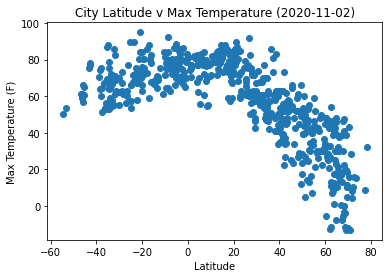

In [11]:
# create scatter plot of Lat v Temp
plt.scatter(city_df['Lat'], city_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude v Max Temperature ({city_date})')
plt.savefig('../output_data/Latitude v. Temperature plot.png')
plt.show()

Tempeartures appear to be hottest the closer the city is to the Equator (0 latitude) and go down as you get closer to each pole. Cities near the North pole are coldest.

## Latitude vs. Humidity Plot

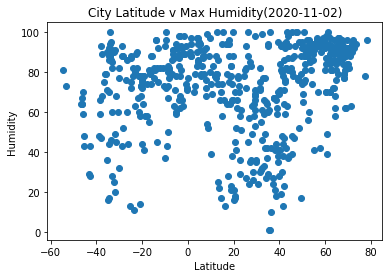

In [12]:
plt.scatter(city_df['Lat'], city_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'City Latitude v Max Humidity({city_date})')
plt.savefig('../output_data/Latitude v. Humidity plot.png')
plt.show()

Humidity is higher concentrated towards the pole and slightly lower as you move towards the Equator and South pole. This makes sense given we are nearing winter in the northern hemisphere.

## Latitude vs. Cloudiness Plot

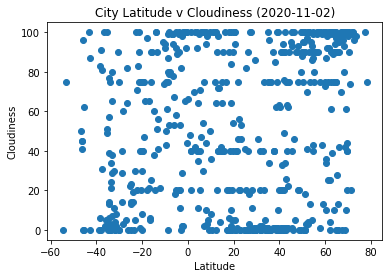

In [13]:
plt.scatter(city_df['Lat'], city_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude v Cloudiness ({city_date})') 
plt.savefig('../output_data/Latitude v. Cloudiness plot.png')
plt.show()

There does not seem to be a clear correlation between city location and cloudiness. 

## Latitude vs. Wind Speed Plot

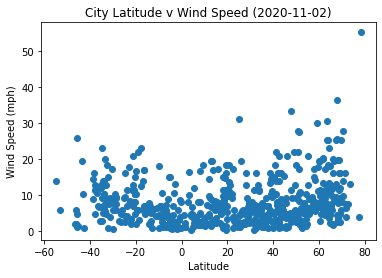

In [14]:
plt.scatter(city_df['Lat'], city_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude v Wind Speed ({city_date})') 
plt.savefig('../output_data/Latitude v. Wind plot.png')
plt.show()

Wind speed seems overall consistent regardless of city location. There are a few outliers near the poles that could be due to seasonal storms. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# create df by north and south hemisphere
north_df = city_df.loc[city_df['Lat']>=0]
south_df = city_df.loc[city_df['Lat']<0]

The r-value is: -0.8398276075873286


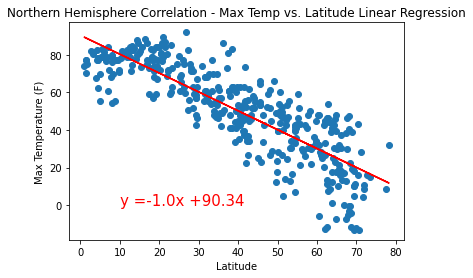

In [27]:
# define x and y values
x_values = north_df['Lat']
y_values = north_df['Max Temp']

# calculate linear regression, y=mx+b
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(x_values,y_values)
nh_fit = nh_slope * x_values + nh_int
line_eq = 'y =' + str(round(nh_slope,2))+'x +' + str(round(nh_int,2))

print(f'The r-value is:', nh_r)

# plot scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values,nh_fit,'-',color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere Correlation - Max Temp vs. Latitude Linear Regression')
plt.annotate(line_eq, (10,0), fontsize=15, color='red')
plt.savefig('../output_data/Northern Hemisphere Correlation - Max Temp v. Latitude Linear Regression.png')
plt.show()


In the Northern Hemisphere, temperature and city location are very closely correlated. The linear regression shows the temperature drops steadily the closer the city is to the North Pole.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5047486789821441


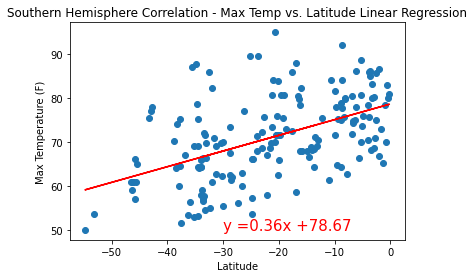

In [28]:
# define x and y values
x_values = south_df['Lat']
y_values = south_df['Max Temp']

# calculate linear regression, y=mx+b
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(x_values,y_values)
nh_fit = nh_slope * x_values + nh_int
line_eq = 'y =' + str(round(nh_slope,2))+'x +' + str(round(nh_int,2))

print(f'The r-value is:', nh_r)

# plot scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values,nh_fit,'-',color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere Correlation - Max Temp vs. Latitude Linear Regression')
plt.annotate(line_eq, (-30,50), fontsize=15,color='red')
plt.savefig('../output_data/Southern Hemisphere Correlation - Max Temp v. Latitude Linear Regression.png')
plt.show()

Temperature and city location appear to be very loosely correlated for cities in the Southern Hemisphere. The closer the city is to the Equator, the hotter the temperature. The loose correlation makes sense given the time of year as the Southern Hemisphere cities are more likely to have overall moderate tempeatures. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24847477818611635


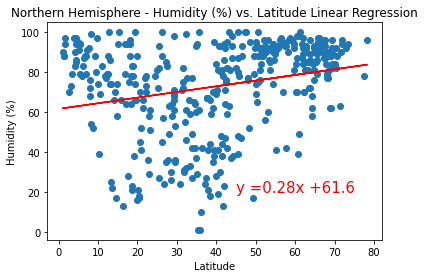

In [31]:
# define x and y values
x_values = north_df['Lat']
y_values = north_df['Humidity']

# calculate linear regression, y=mx+b
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(x_values,y_values)
nh_fit = nh_slope * x_values + nh_int
line_eq = 'y =' + str(round(nh_slope,2))+'x +' + str(round(nh_int,2))

print(f'The r-value is:', nh_r)

# plot scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values,nh_fit,'-',color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(line_eq, (45,20), fontsize=15, color='red')
plt.savefig('../output_data/Northern Hemisphere - Humidity v. Latitude Linear Regression.png')
plt.show()

Humidity is loosely correlated to city location in the Northern Hemipshere. We can see the closer the city is to the North pole, the higher the humidity which is what we would imagine as we move closer to winter, rain and snow. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2977224097512074


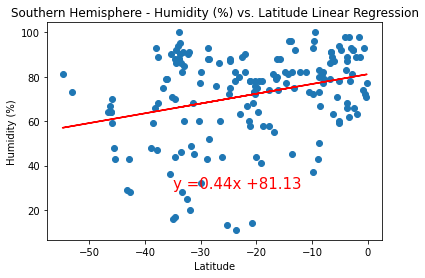

In [34]:
# define x and y values
x_values = south_df['Lat']
y_values = south_df['Humidity']

# calculate linear regression, y=mx+b
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(x_values,y_values)
nh_fit = nh_slope * x_values + nh_int
line_eq = 'y =' + str(round(nh_slope,2))+'x +' + str(round(nh_int,2))

print(f'The r-value is:', nh_r)

# plot scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values,nh_fit,'-',color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(line_eq, (-35,30), fontsize=15, color='red')
plt.savefig('../output_data/Southern Hemisphere - Humidity v. Latitude Linear Regression.png')
plt.show()

Humidity is loosely correlated to city location in the Southern Hemipshere. Humidity is increases slightly as we move towards the Equator. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.27396453002444854


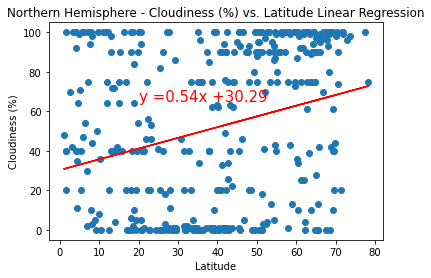

In [37]:
# define x and y values
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

# calculate linear regression, y=mx+b
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(x_values,y_values)
nh_fit = nh_slope * x_values + nh_int
line_eq = 'y =' + str(round(nh_slope,2))+'x +' + str(round(nh_int,2))

print(f'The r-value is:', nh_r)

# plot scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values,nh_fit,'-',color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.annotate(line_eq, (20,65),fontsize=15, color='red')
plt.savefig('../output_data/Northern Hemisphere - Cloudiness v. Latitude Linear Regression.png')
plt.show()

There does not seem to be a strong correlation between cloudiness and city location in the Northern Hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.35789391655755204


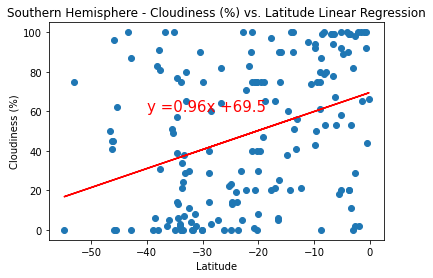

In [38]:
# define x and y values
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

# calculate linear regression, y=mx+b
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(x_values,y_values)
nh_fit = nh_slope * x_values + nh_int
line_eq = 'y =' + str(round(nh_slope,2))+'x +' + str(round(nh_int,2))

print(f'The r-value is:', nh_r)

# plot scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values,nh_fit,'-',color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.annotate(line_eq, (-40,60),fontsize=15, color='red')
plt.savefig('../output_data/Southern Hemisphere - Cloudiness v. Latitude Linear Regression.png')
plt.show()

There does not seem to be a strong correlation between cloudiness and city location in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.29356143274324864


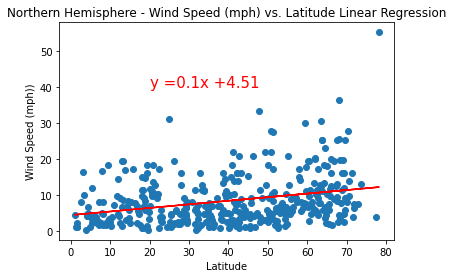

In [39]:
# define x and y values
x_values = north_df['Lat']
y_values = north_df['Wind Speed']

# calculate linear regression, y=mx+b
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(x_values,y_values)
nh_fit = nh_slope * x_values + nh_int
line_eq = 'y =' + str(round(nh_slope,2))+'x +' + str(round(nh_int,2))

print(f'The r-value is:', nh_r)

# plot scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values,nh_fit,'-',color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.annotate(line_eq, (20,40),fontsize=15, color='red')
plt.savefig('../output_data/Northern Hemisphere - Wind Speed v. Latitude Linear Regression.png')
plt.show()

There is a very weak correlation between wind speed and city location for cities in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3084443114705898


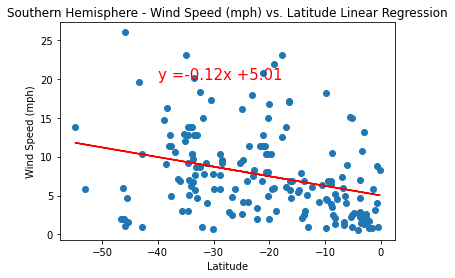

In [41]:
# define x and y values
x_values = south_df['Lat']
y_values = south_df['Wind Speed']

# calculate linear regression, y=mx+b
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(x_values,y_values)
nh_fit = nh_slope * x_values + nh_int
line_eq = 'y =' + str(round(nh_slope,2))+'x +' + str(round(nh_int,2))

print(f'The r-value is:', nh_r)

# plot scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values,nh_fit,'-',color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.annotate(line_eq, (-40,20), fontsize=15, color='red')
plt.savefig('../output_data/Southern Hemisphere - Wind Speed v. Latitude Linear Regression.png')
plt.show()

There is a very weak correlation between wind speed and city location for cities in the Southern Hemisphere.